In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
DATA_PATH = PROJECT_ROOT / "data"
RAW_DATA = DATA_PATH / "raw" / "train.csv"


In [5]:
# Load the data
df = pd.read_csv(RAW_DATA)

print(f'Data Loaded. Shape: {df.shape}')
print("Columns: ", df.columns.tolist())

Data Loaded. Shape: (593994, 13)
Columns:  ['id', 'annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade', 'loan_paid_back']


In [6]:
TARGET = "loan_paid_back"

# 1. Check Global Default Rate
print(f"Global Default Rate: {df[TARGET].mean():.2%}")



Global Default Rate: 79.88%



--- Default Rate by Employment Status ---
                    count      mean
employment_status                  
Employed           450645  0.894145
Retired             16453  0.997204
Self-employed       52480  0.898457
Student             11931  0.263515
Unemployed          62485  0.077619


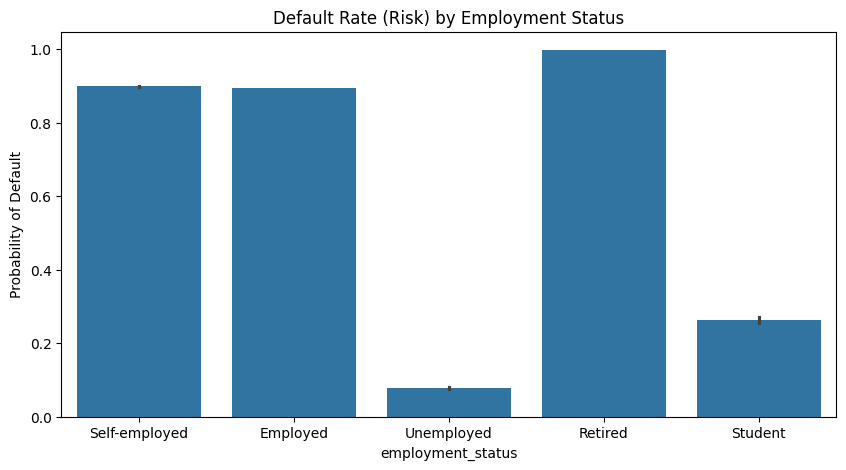

In [7]:
# 2. Check Default Rate by Employment Status
# We want to see if 'Unemployed' actually has a 0% default rate (which would be weird)
if 'employment_status' in df.columns:
    print("\n--- Default Rate by Employment Status ---")
    print(df.groupby('employment_status')[TARGET].agg(['count', 'mean']))
    
    # Visualize it
    plt.figure(figsize=(10, 5))
    sns.barplot(x='employment_status', y=TARGET, data=df)
    plt.title("Default Rate (Risk) by Employment Status")
    plt.ylabel("Probability of Default")
    plt.show()
else:
    pass